In [420]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [421]:
dataset = pd.read_csv('cgpa_score.csv')
dataset.head()

,cgpa,score,placed
0,3.20,61.7,0
1,2.94,64.4,0
2,3.26,77.5,1
3,3.61,76.1,1
4,2.91,69.8,0


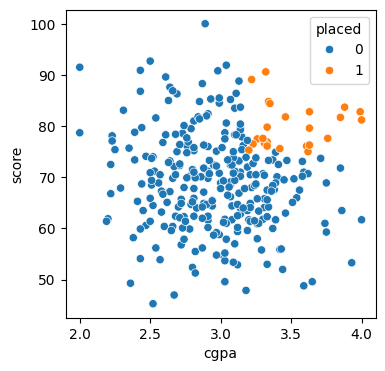

In [422]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='cgpa',y='score', data=dataset,hue='placed')
plt.show()

In [423]:
x = dataset.drop(columns='placed')
y = dataset['placed']

In [424]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x), columns=x.columns)

In [425]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=29)


In [426]:
# 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'

In [427]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(x_train,y_train)

SVC()

In [428]:
svc.score(x_test,y_test)*100, svc.score(x_train,y_train)*100

(94.16666666666667, 98.33333333333333)

In [429]:
x,y

(         cgpa     score
 0    0.530272 -0.842553
 1   -0.148114 -0.561088
 2    0.686823  0.804538
 3    1.600036  0.658593
 4   -0.226390  0.001842
 ..        ...       ...
 295 -0.722134 -0.508965
 296  0.947741 -0.258774
 297  0.321538 -0.998922
 298  0.869466 -0.435992
 299  0.660731  0.418827
 
 [300 rows x 2 columns],
 0      0
 1      0
 2      1
 3      1
 4      0
       ..
 295    0
 296    0
 297    0
 298    0
 299    0
 Name: placed, Length: 300, dtype: int64)

In [434]:
svc.predict([[1.600036,0.658593]])

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


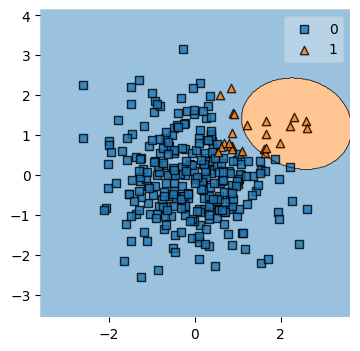

In [431]:
plt.figure(figsize=(4,4))
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=svc)
plt.show()